In [59]:
from lib.utils import *

In [60]:
raw = load_raw(0)

In [61]:
import numpy as np
from sklearn.impute import SimpleImputer

In [62]:
eeg = raw.get_data('EEG')[0].reshape(-1,1)

In [53]:
mean = np.mean(eeg)
std = np.std(eeg,axis=0)

lower_outliers = np.where(eeg < (mean - 5*std))[0]
upper_outliers = np.where(eeg > (mean + 5*std))[0]

eeg[lower_outliers] = np.nan
eeg[upper_outliers] = np.nan

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
eeg_no_outliers = imp_mean.fit_transform(eeg)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
eeg_normal = scaler.fit_transform(eeg_no_outliers)

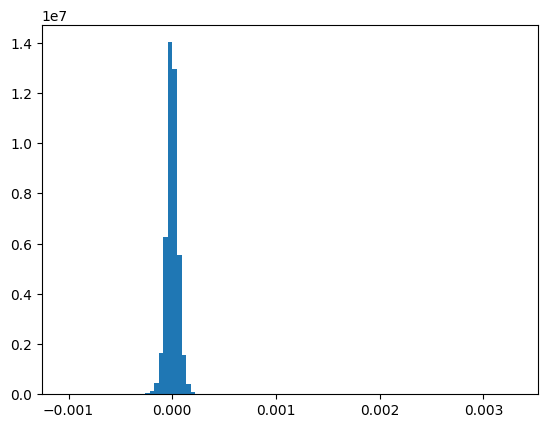

In [63]:
cap = plt.hist(eeg,bins=100)

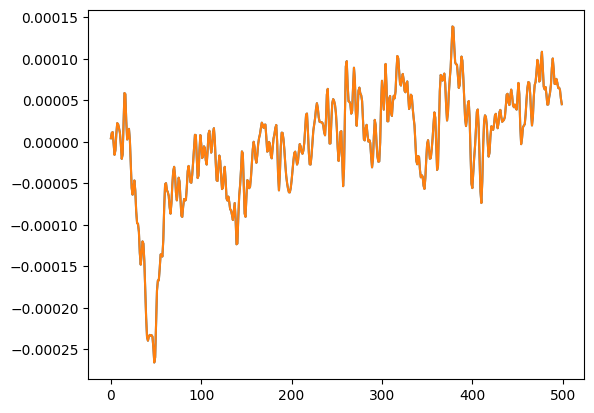

In [58]:
plt.plot(eeg[:500])
plt.plot(eeg_no_outliers[:500])